In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [7]:
#insert training data
import sys
import types
import pip



import pandas as pd


def __iter__(self): return 0

os.chdir("/Users/rajeshjeyapaul/Documents/2018/RBS/data")
#app_train = pd.read_csv(body, skipinitialspace=True)
app_train = pd.read_csv("train_indessa.csv")
app_test = pd.read_csv("test_indessa.csv")
#app_train.head(2)



In [8]:
 

 
app_test.head(2)



,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,4 years,RENT,73500.0,Source Verified,n,NaN,credit_card,wrap it up,450xx,OH,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,f,3915.61,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,5 years,MORTGAGE,105000.0,Source Verified,n,NaN,major_purchase,Major purchase,275xx,NC,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,w,1495.06,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0


In [9]:
#Data Cleaning
#Drop the columns having more than ~50% missing values
app_train.dropna(axis=1, thresh=250000)
app_test.dropna(axis=1, thresh=150000)

print("Shape of training dataset after removing missing value columns:",app_train.shape)

Shape of training dataset after removing missing value columns: (532428, 45)


In [10]:
#Remove some of the columns which are not related to the target variable, and/or are correlated with other columns
del_col_names = ["desc", "emp_title", "purpose", "title", "zip_code", "addr_state", "verification_status", "pymnt_plan",
                "batch_enrolled", "initial_list_status", "verification_status_joint", "application_type", 
                 "sub_grade"]
app_train_reduced = app_train.drop(labels = del_col_names, axis = 1) 
app_test_reduced = app_test.drop(labels = del_col_names, axis = 1) 

print("Current shape of train dataset :",app_train_reduced.shape)
print("Current shape of test dataset :",app_test_reduced.shape)

Current shape of train dataset : (532428, 32)
Current shape of test dataset : (354951, 31)


In [11]:
#Data encoding

app_train_reduced["emp_length"] = app_train_reduced["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'', 's':''
                                                                           }, regex = True)
app_train_reduced["emp_length"] = app_train_reduced["emp_length"].replace(r'^\s*$', np.nan, regex=True)

app_train_reduced["term"] = app_train_reduced["term"].replace({'months':'', ' ':'','n/a':''
                                                                           }, regex = True)
app_train_reduced["term"] = app_train_reduced["term"].replace(r'^\s*$', np.nan, regex=True)

app_train_reduced["last_week_pay"] = app_train_reduced["last_week_pay"].replace({'week':'', 'th':'', ' ':'', 'n/a':'', 'NA':''
                                                                           }, regex = True)
app_train_reduced["last_week_pay"] = app_train_reduced["last_week_pay"].replace(r'^\s*$', np.nan, regex=True)

app_train_reduced = pd.get_dummies(app_train_reduced, columns=["grade", "home_ownership"])

print("Current shape of training dataset :",app_train_reduced.shape)
app_train_reduced.head(2)

Current shape of training dataset : (532428, 43)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,58189336,14350,14350,14350.0,36,19.19,9,28700.0,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,74.0,26,0.0,0.0,28699.0,30800.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,70011223,4800,4800,4800.0,36,10.99,1,65000.0,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,NaN,9,0.0,0.0,9974.0,32900.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [12]:
# Test data encoding

app_test_reduced["emp_length"] = app_test_reduced["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'', 's':'', 'n/a':''
                                                                           }, regex = True)
app_test_reduced["emp_length"] = app_test_reduced["emp_length"].replace(r'^\s*$', np.nan, regex=True)

app_test_reduced["term"] = app_test_reduced["term"].replace({'months':'', ' ':'', 'n/a':''
                                                                           }, regex = True)
app_test_reduced["term"] = app_test_reduced["term"].replace(r'^\s*$', np.nan, regex=True)

app_test_reduced["last_week_pay"] = app_test_reduced["last_week_pay"].replace({'week':'', 'th':'', ' ':'', 'n/a':'', 'NA':''
                                                                           }, regex = True)
app_test_reduced["last_week_pay"] = app_test_reduced["last_week_pay"].replace(r'^\s*$', np.nan, regex=True)

app_test_reduced = pd.get_dummies(app_test_reduced, columns=["grade", "home_ownership"])

print("Current shape of test dataset :",app_test_reduced.shape)
app_test_reduced.head(2)

Current shape of test dataset : (354951, 41)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,11937648,14000,14000,14000.0,60,16.24,4,73500.0,28.65,1.0,1.0,20.0,NaN,16.0,0.0,29828,65.3,53.0,3915.61,0.0,0.0,0.0,0.0,NaN,104,0.0,0.0,85230.0,45700.0,0,0,1,0,0,0,0,0,0,0,0,1
1,38983318,16000,16000,16000.0,60,9.49,5,105000.0,31.19,0.0,0.0,NaN,NaN,8.0,0.0,4161,19.4,63.0,1495.06,0.0,0.0,0.0,0.0,NaN,57,0.0,0.0,444991.0,21400.0,0,1,0,0,0,0,0,1,0,0,0,0


In [13]:
# missing values
from sklearn.preprocessing import MinMaxScaler, Imputer
# Median imputation of missing values
imputer = Imputer(missing_values='NaN', strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

app_train_clean = app_train_reduced.drop(columns=['loan_status', 'home_ownership_ANY', 'member_id'])
app_test_clean = app_test_reduced.drop(columns=['member_id'])

features = list(app_train_clean.columns)

# Fit on the training data
imputer.fit(app_train_clean)

# Transform both training and testing data
app_train_clean = imputer.transform(app_train_clean)
app_test_clean = imputer.transform(app_test_clean)


app_train_clean = pd.DataFrame(app_train_clean, columns = features)

app_test_clean = pd.DataFrame(app_test_clean, columns = features)

print("Current shape of training dataset :", app_train_clean.shape)



Current shape of training dataset : (532428, 40)


In [14]:
app_train_clean['loan_to_income'] = app_train_clean['annual_inc']/app_train_clean['funded_amnt']
app_test_clean['loan_to_income'] = app_test_clean['annual_inc']/app_test_clean['funded_amnt']

app_train_clean['bad_state'] = app_train_clean['acc_now_delinq'] + (app_train_clean['total_rec_late_fee']/app_train_clean['funded_amnt']) + \
(app_train_clean['recoveries']/app_train_clean['funded_amnt']) + \
(app_train_clean['collection_recovery_fee']/app_train_clean['funded_amnt']) + \
(app_train_clean['collections_12_mths_ex_med']/app_train_clean['funded_amnt'])

app_test_clean['bad_state'] = app_test_clean['acc_now_delinq'] + (app_test_clean['total_rec_late_fee']/app_test_clean['funded_amnt']) + \
(app_test_clean['recoveries']/app_test_clean['funded_amnt']) + (app_test_clean['collection_recovery_fee']/app_test_clean['funded_amnt']) + \
(app_test_clean['collections_12_mths_ex_med']/app_test_clean['funded_amnt'])

app_train_clean.loc[app_train_clean['bad_state'] > 0, 'bad_state'] = 1
app_test_clean.loc[app_test_clean['bad_state'] > 0, 'bad_state'] = 1

app_train_clean['avl_lines'] = app_train_clean['total_acc'] - app_train_clean['open_acc']
app_test_clean['avl_lines'] = app_test_clean['total_acc'] - app_test_clean['open_acc']

app_train_clean['int_paid'] = app_train_clean['total_rec_int'] + app_train_clean['total_rec_late_fee']
app_test_clean['int_paid'] = app_test_clean['total_rec_int'] + app_test_clean['total_rec_late_fee']


# Calculating EMIs paid (in terms of percent)
app_train_clean['emi_paid_progress_perc'] = ((app_train_clean['last_week_pay']/(app_train_clean['term']/12*52+1))*100)
app_test_clean['emi_paid_progress_perc'] = ((app_test_clean['last_week_pay']/(app_test_clean['term']/12*52+1))*100)


# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
app_train_clean['total_repayment_progress'] = ((app_train_clean['last_week_pay']/(app_train_clean['term']/12*52+1))*100) + \
((app_train_clean['recoveries']/app_train_clean['funded_amnt']) * 100)

app_test_clean['total_repayment_progress'] = ((app_test_clean['last_week_pay']/(app_test_clean['term']/12*52+1))*100) + \
((app_test_clean['recoveries']/app_test_clean['funded_amnt']) * 100)




In [15]:
#drop columns where most of the values are zero
app_train_clean = app_train_clean.drop(columns=["mths_since_last_record", "mths_since_last_delinq", "total_rec_late_fee", "recoveries","collection_recovery_fee",
                     "collections_12_mths_ex_med"], axis = 1)
app_test_clean = app_test_clean.drop(columns=["mths_since_last_record", "mths_since_last_delinq", "total_rec_late_fee", "recoveries","collection_recovery_fee",
                     "collections_12_mths_ex_med"], axis = 1)

In [16]:
#Check and remove outliers
def GetIQR(column):
    Q1 = app_train_clean[column].quantile(0.25)
    Q3 = app_train_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    IQR
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    return upper_limit, lower_limit

In [17]:
#app_train_clean = app_train_backup
#app_test_clean = app_test_backup
app_train_backup = app_train_clean
app_test_backup = app_test_clean

In [18]:
#detect and remove outliers

columns=['int_rate', 'annual_inc', 'dti', 'inq_last_6mths']
app_train_clean['Outlier'] = 0
for column in columns:
    upper_limit, lower_limit = GetIQR(column)
    
    app_train_clean.loc[ (app_train_clean[column] > upper_limit) | (app_train_clean[column] < lower_limit) 
                        & (app_train_clean['Outlier'] == 0), 'Outlier'] = 1
    
app_train_clean['loan_status'] = app_train_reduced['loan_status']
app_train_clean = app_train_clean.query('Outlier == 0')
app_train_clean.shape

(475276, 42)

In [19]:
column='annual_inc'
upper_limit, lower_limit = GetIQR(column)
print(upper_limit, lower_limit)
print(app_train_clean[column].describe())
app_train_clean.query('@lower_limit <= '+ column +' <= @upper_limit').shape

145000.0 -15000.0
count    475276.000000
mean      67252.313014
std       29852.298945
min        1896.000000
25%       45000.000000
50%       61500.000000
75%       85000.000000
max      157500.000000
Name: annual_inc, dtype: float64


(467873, 42)

In [20]:
app_train_clean.query(column + ' > 44').shape

(475276, 42)

In [21]:
print('before ', app_train_clean.shape)
filtered = app_train_clean.query('@lower_limit <= '+ column +' <= @upper_limit')
print('after ', filtered.shape)

before  (475276, 42)
after  (467873, 42)


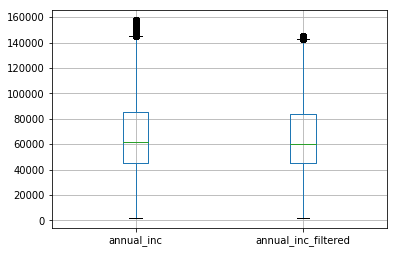

In [22]:
df = pd.DataFrame(app_train_clean, columns=[column])
df.join(filtered[column], rsuffix='_filtered').boxplot(return_type='axes')

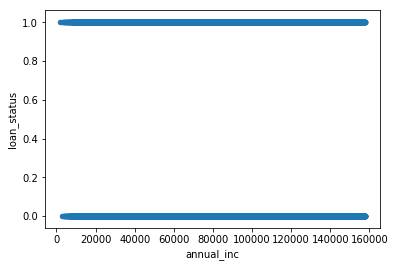

In [23]:
app_train_clean['loan_status'] = app_train_reduced['loan_status']
app_train_clean.plot.scatter(column, 'loan_status')

In [24]:
app_train_clean.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,Outlier,loan_status
0,14350.0,14350.0,14350.0,36.0,19.19,9.0,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,74.0,26.0,0.0,0.0,28699.0,30800.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.000000,0.0,14.0,1173.84,16.560510,16.560510,0,0
1,4800.0,4800.0,4800.0,36.0,10.99,1.0,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,44.0,9.0,0.0,0.0,9974.0,32900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.541667,0.0,7.0,83.95,5.732484,5.732484,0,0


In [25]:
scl = preprocessing.StandardScaler() #instance of preprocessing
app_train_clean.drop('Outlier', axis=1, inplace=True)
fields = app_train_clean.columns.values
encoded_columns = ['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_MORTGAGE',
                   'home_ownership_NONE','home_ownership_OTHER', 'home_ownership_OWN','home_ownership_RENT', 'bad_state', 'loan_status']
encoded_data = app_train_clean[encoded_columns]
transformed_data = app_train_clean.drop(columns=encoded_columns)
transformed_fields = transformed_data.columns.values
transformed_data = pd.DataFrame(scl.fit_transform(transformed_data[transformed_fields]), columns = transformed_fields)
app_train_clean = pd.concat([transformed_data.reset_index(drop=True), encoded_data.reset_index(drop=True)], axis=1)
#app_train_clean['loan_status'] = app_train_reduced['loan_status']
app_train_clean.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_to_income,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,bad_state,loan_status
0,-0.000035,0.001449,0.005384,-0.647444,1.459459,0.845851,-1.291437,1.865951,-0.361994,0.712277,0.509065,1.455469,0.407975,0.751290,0.283888,-0.251563,2.740355,-0.723253,-0.06437,-0.103757,-0.760192,0.039823,-0.718260,0.072537,-0.251699,-0.618067,-0.627843,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,-1.172176,-1.171481,-1.166396,-0.647444,-0.490279,-1.478179,-0.075449,-1.781238,-0.361994,0.712277,-1.032371,-0.338348,-0.491859,-1.351283,-1.014131,-0.797824,-0.003553,-1.111775,-0.06437,-0.103757,-0.910342,0.120703,1.171311,-0.722577,-0.797872,-1.035885,-1.044964,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.533942,-0.532817,-0.528359,-0.647444,-1.377172,-1.187676,-0.745414,0.001350,-0.361994,-0.743520,-1.225051,-0.338348,-0.295286,-1.014197,-0.494924,-0.811597,-0.003553,-1.111775,-0.06437,-0.068942,-0.683244,0.197731,-0.308967,0.072537,-0.811643,-1.035885,-1.044964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [26]:
app_train_clean.shape

(475276, 41)

In [27]:

#encoded_data = app_test_clean[encoded_columns[:-1]]
#transformed_data = app_test_clean.drop(columns=encoded_columns[:-1])
#transformed_fields = transformed_data.columns.values
#transformed_data = pd.DataFrame(scl.fit_transform(transformed_data[transformed_fields]), columns = transformed_fields)
#app_test_clean = pd.concat([transformed_data, encoded_data], axis=1)
app_test_temp = app_test_clean
fields = app_test_clean.columns.values
app_test_clean =  pd.DataFrame(scl.fit_transform(app_test_clean[fields]), columns = fields)
for field in fields:
    app_test_clean[field] = app_test_temp[field]

print("Current shape of testing dataset :", app_test_clean.shape)



Current shape of testing dataset : (354951, 40)


In [28]:
app_train_clean.shape

(475276, 41)

In [29]:
#Evaluate correlation between the features selected so far

app_train_clean.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [30]:
#using correlation, drop few more columns
app_train_clean = app_train_clean.drop(labels = ['funded_amnt_inv'], axis = 1) 
app_train_clean.head(3)

,loan_amnt,funded_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_to_income,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,bad_state,loan_status
0,-0.000035,0.001449,-0.647444,1.459459,0.845851,-1.291437,1.865951,-0.361994,0.712277,0.509065,1.455469,0.407975,0.751290,0.283888,-0.251563,2.740355,-0.723253,-0.06437,-0.103757,-0.760192,0.039823,-0.718260,0.072537,-0.251699,-0.618067,-0.627843,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,-1.172176,-1.171481,-0.647444,-0.490279,-1.478179,-0.075449,-1.781238,-0.361994,0.712277,-1.032371,-0.338348,-0.491859,-1.351283,-1.014131,-0.797824,-0.003553,-1.111775,-0.06437,-0.103757,-0.910342,0.120703,1.171311,-0.722577,-0.797872,-1.035885,-1.044964,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,-0.533942,-0.532817,-0.647444,-1.377172,-1.187676,-0.745414,0.001350,-0.361994,-0.743520,-1.225051,-0.338348,-0.295286,-1.014197,-0.494924,-0.811597,-0.003553,-1.111775,-0.06437,-0.068942,-0.683244,0.197731,-0.308967,0.072537,-0.811643,-1.035885,-1.044964,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [31]:
app_test_clean = app_test_clean.drop(labels = ['funded_amnt_inv'], axis = 1) 
app_test_clean.head(3)

,loan_amnt,funded_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,mths_since_last_major_derog,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress
0,14000.0,14000.0,60.0,16.24,4.0,73500.0,28.65,1.0,1.0,16.0,0.0,29828.0,65.3,53.0,3915.61,44.0,104.0,0.0,0.0,85230.0,45700.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.250000,0.0,37.0,3915.61,39.846743,39.846743
1,16000.0,16000.0,60.0,9.49,5.0,105000.0,31.19,0.0,0.0,8.0,0.0,4161.0,19.4,63.0,1495.06,44.0,57.0,0.0,0.0,444991.0,21400.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.562500,0.0,55.0,1495.06,21.839080,21.839080
2,11050.0,11050.0,60.0,15.61,10.0,62300.0,21.73,1.0,0.0,11.0,1.0,12064.0,74.0,20.0,2096.21,26.0,70.0,0.0,0.0,105737.0,16300.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.638009,0.0,9.0,2096.21,26.819923,26.819923


In [32]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [33]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
sample_train_data = app_train_clean

In [35]:
# uncomment and run it if best parameters are required for the classifiers, by using grid search

""""loanstatus_0 = app_train_clean[app_train_clean["loan_status"]==0]
loanstatus_1 = app_train_clean[app_train_clean["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=50000)
subset_of_loanstatus_1 = loanstatus_1.sample(n=50000)
sample_train_data = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
sample_train_data = sample_train_data.sample(frac=1).reset_index(drop=True)

#train_labels = app_train_clean['loan_status']
#train_clean = app_train_clean.drop(columns = ['loan_status'])"""

X_train, X_test, y_train, y_test = train_test_split(sample_train_data.iloc[:,:-1], sample_train_data.iloc[:,-1], test_size=0.3, random_state=42)

In [36]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
# create the RFE model and select attributes
clf_LR = linear_model.LogisticRegression(C=0.0001)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 25)
rfe = rfe.fit(sample_train_data.iloc[:,:-1].values, sample_train_data.iloc[:,-1].values)
# summarize the selection of the attributes
print(sample_train_data.columns.values)
print(rfe.support_)
print(rfe.ranking_)

['loan_amnt' 'funded_amnt' 'term' 'int_rate' 'emp_length' 'annual_inc'
 'dti' 'delinq_2yrs' 'inq_last_6mths' 'open_acc' 'pub_rec' 'revol_bal'
 'revol_util' 'total_acc' 'total_rec_int' 'mths_since_last_major_derog'
 'last_week_pay' 'acc_now_delinq' 'tot_coll_amt' 'tot_cur_bal'
 'total_rev_hi_lim' 'loan_to_income' 'avl_lines' 'int_paid'
 'emi_paid_progress_perc' 'total_repayment_progress' 'grade_A' 'grade_B'
 'grade_C' 'grade_D' 'grade_E' 'grade_F' 'grade_G'
 'home_ownership_MORTGAGE' 'home_ownership_NONE' 'home_ownership_OTHER'
 'home_ownership_OWN' 'home_ownership_RENT' 'bad_state' 'loan_status']
[False False  True  True False False  True  True  True  True  True False
  True  True  True False  True False  True False False False  True  True
  True  True  True  True  True  True  True False False  True False False
  True  True  True]
[10  2  1  1  7  3  1  1  1  1  1  6  1  1  1  9  1 13  1 11  5  8  1  1
  1  1  1  1  1  1  1  4 12  1 15 14  1  1  1]


In [37]:
#PCA (Principal Component Analysis)
from sklearn.decomposition import PCA 
pca = PCA(n_components=25, whiten=True)
train_clean_pca = pca.fit_transform(X_train)
test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.17351643 0.13510908 0.09464579 0.06678291 0.0540726  0.05006596
 0.04729741 0.03859782 0.03660099 0.03451755 0.03269169 0.03128025
 0.03043609 0.02614857 0.02435829 0.02301413 0.01790523 0.01654916
 0.01388789 0.00992132 0.00960473 0.0079259  0.00742708 0.00483748
 0.00458301]


In [38]:
"""features = ['funded_amnt','term', 'int_rate','annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
            'revol_util', 'total_acc', 
            'total_rec_int', 'last_week_pay', 'tot_coll_amt', 'total_rev_hi_lim', 'avl_lines',
            'int_paid', 'emi_paid_progress_perc', 'total_repayment_progress', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
            'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'bad_state',  'loan_status']"""

features = ['term', 'int_rate', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
            'total_rec_int', 'last_week_pay', 'tot_coll_amt', 'avl_lines',
            'int_paid', 'emi_paid_progress_perc', 'total_repayment_progress', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
            'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'bad_state',  'loan_status']

""""features = ['loan_amnt', 'funded_amnt', 'term','int_rate','annual_inc','dti','delinq_2yrs', 'inq_last_6mths',
                'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'total_rec_int',
                'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'last_week_pay','total_rev_hi_lim',
                'loan_to_income', 'avl_lines','int_paid', 'emi_paid_progress_perc', 'total_repayment_progress', 'bad_state',
                'loan_status']"""

X_train, X_test = X_train[features[:-1]], X_test[features[:-1]]
app_train_clean = app_train_clean[features]
sample_train_data = sample_train_data[features]
app_test_clean = app_test_clean[features[:-1]]
print('Training Dataset Shape is ', app_train_clean.shape)
print('Test Dataset Shape is ', app_test_clean.shape)

Training Dataset Shape is  (475276, 26)
Test Dataset Shape is  (354951, 25)


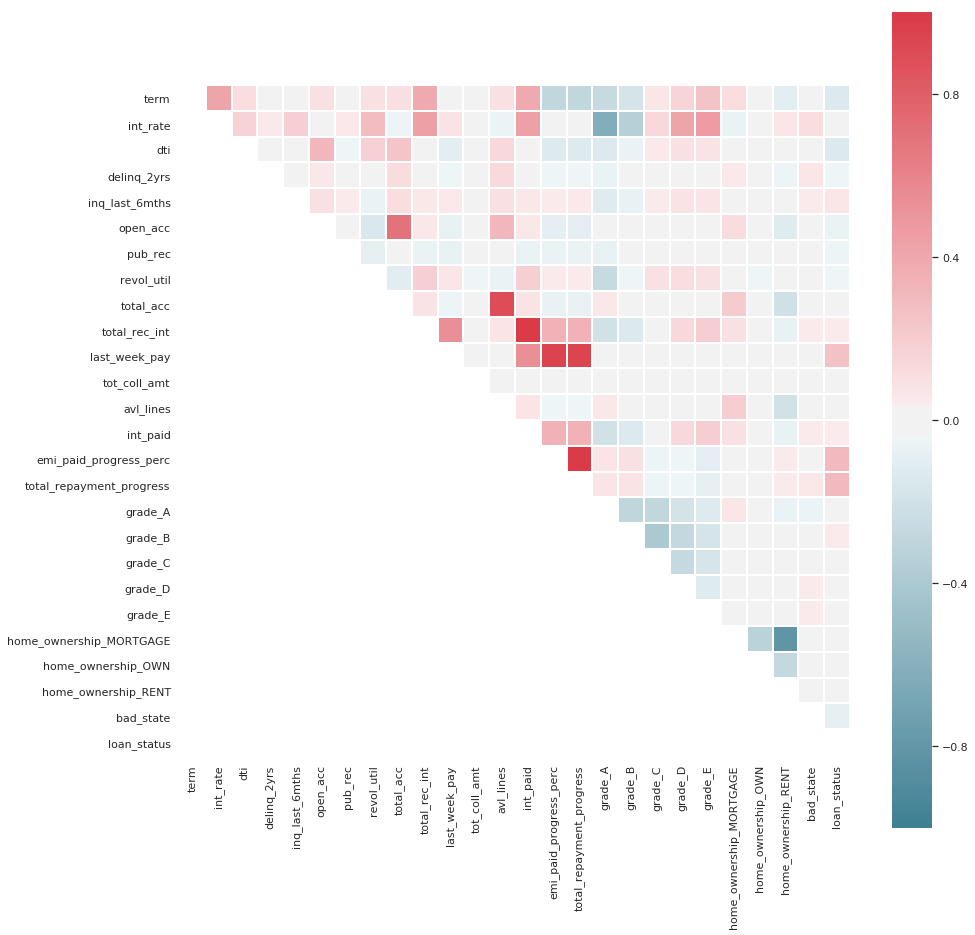

In [39]:
dataViz = sample_train_data
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(15,15)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits
import xgboost
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
  #  if ylim is not None:
  #      plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    #print(test_scores)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    #plt.show()
    return plt


X, y = sample_train_data.iloc[:,:-1].values, sample_train_data.iloc[:,-1].values
title = "Learning Curves (XG Boost)"

cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
estimator = xgboost.sklearn.XGBClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.0), cv=10, n_jobs=-1)
plt.show()

[learning_curve] Training set sizes: [ 42774 139017 235260 331503 427747]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
import xgboost

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    min_child_weight=6,
    learning_rate=0.05,
    seed=27, 
    max_depth=6, 
    gamma=0, 
    reg_alpha=0.005,
    n_estimators=1000,
    subsample=0.8,
colsample_bytree=0.8,
scale_pos_weight=1)

eval_set=[(X_test, y_test)]

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set)

y_pred_bin = clf.predict(X_test)
y_pred = clf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred_bin)
print("Accuracy: %.10f%%" % (accuracy * 100.0))

accuracy_per_roc_auc = metrics.roc_auc_score(np.array(y_test).flatten(), y_pred_bin)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))

In [ ]:
plotAUC(y_test,y_pred, 'XgBoost')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred_bin, normalize=True)
plt.show()

In [ ]:
#Models

#Uncomment the below block for max feature selection for random forest

""""from sklearn.grid_search import RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,sample_train_data.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=sample_train_data.iloc[:,:-1].values
y=sample_train_data.iloc[:,-1].values
rand.fit(X,y)
mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)"""

In [ ]:
#randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest = RandomForestClassifier(n_estimators=20, bootstrap=True,criterion = "gini",random_state=0, max_features=25, max_depth=50 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

In [ ]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance')
ax.set_ylabel('Normalized Gini Importance')

In [ ]:
plotAUC(y_test,y_pred, 'xg boost') 
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

In [ ]:
#Logistic Regression with Grid Search
#Uncomment for selection of C parameter using GridSearch
"""from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=sample_train_data.iloc[:,:-1].values
    y=sample_train_data.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)"""

In [ ]:
#clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR = linear_model.LogisticRegression(C=0.1)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,y_pred, 'XG Boost')
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=0.0001, loss='squared_hinge')
sgd_clf.fit(X_train, y_train)

#SGD_Predict_bin = sgd_clf.predict_proba(X_test)[:,1]
SGD_Predict = sgd_clf.predict(X_test)
SGD_Accuracy = accuracy_score(y_test,SGD_Predict.round())
print("SGD Classifier accuracy is ",SGD_Accuracy)
plotAUC(y_test,SGD_Predict, 'SGD Classifier')
plotAUC(y_test,y_pred, 'XG Boost')
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(SGD_Predict, normalize=True)
plt.show()

In [ ]:
#Support Vector Machines(SVM) with Grid Search CV
#Uncomment for selection of C parameter using GridSearch
"""from sklearn.grid_search import GridSearchCV    ## takes too much time to run this cell.
clf_svm = svm.SVC()
powers = range(0,1)
cs = [10**i for i in powers]
param_grid = dict(C=cs)
grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')
grid.fit(sample_train_data.iloc[:,:-1].values, sample_train_data.iloc[:,-1].values)
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]# create a list of the mean scores only
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)"""

In [ ]:
#clf_svm = svm.SVC(kernel = "rbf", C=grid.best_estimator_.C)
clf_svm = svm.SVC(kernel = "rbf", C=0.0001)
clf_svm.fit(X_train.iloc[:,:],y_train)
predictions_svm = clf_svm.predict(X_test.iloc[:,:])
predictproba_svm = clf_svm.decision_function(X_test.iloc[:,:])
SVM_Accuracy = accuracy_score(y_test,predictions_svm)
print("SVM accuracy is ",SVM_Accuracy)
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,y_pred,'XG Boost')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions_svm, normalize=True)
plt.show()

In [ ]:
#K Nearest Neighbors(KNN) with Grid Search CV
#KNN_Acc = knnfunc(2,10) - 74.8 max, 75.7 for 15, 25 - 76.2, 30 - 76.1
#Uncomment for selection of C parameter using GridSearch
"""from sklearn.grid_search import GridSearchCV    ## takes too much time to run this cell.
clf_knn = KNeighborsClassifier()
k_range = list(range(35, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')
grid.fit(sample_train_data.iloc[:,:-1].values, sample_train_data.iloc[:,-1].values)
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]# create a list of the mean scores only
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)"""

In [ ]:
#print("",grid.best_params_['n_neighbors'])
#clf_knn_final = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])   #taking the the best from the above cell and using it to find predictions
clf_knn_final = KNeighborsClassifier(n_neighbors=1)
clf_knn_final.fit(X_train,y_train)
knn_pred = clf_knn_final.predict(X_test)
knn_predictproba = clf_knn_final.predict_proba(X_test)[:,1]
KNN_Acc = accuracy_score(y_test,knn_pred)
print("KNN accuracy is ",KNN_Acc)
plotAUC(y_test,y_pred, 'XG Boost')
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,knn_predictproba,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(knn_pred, normalize=True)
plt.show()

In [ ]:
from IPython.display import HTML
import base64
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [ ]:
#Score Test Data
#rf_scored = randomForest.predict(app_test_clean[:100])

#xgScore = clf.predict(app_test_clean[:40])
#xgScore = clf.predict(X_test)
#rfScore = randomForest.predict(app_test_clean[5000:10000])
#lrScore = clf_LR.predict(app_test_clean[5000:10000])
sgScore = sgd_clf.predict(app_test_clean[5000:10000])
#xgScore = clf.predict(app_test_clean[5000:10000])
temp = app_test_reduced.loc[5000:9999]

temp['will_default'] = sgScore
temp.shape
create_download_link(temp.loc[5000:9999], filename="sgdclassifier.csv")